In [12]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
COLORS = "brgpy"

In [22]:
def plot_multigraph(graph,with_labels=False):
    G = nx.MultiDiGraph(graph)
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 100, alpha = 1)
    nx.draw_networkx_labels(G,pos)
    ax = plt.gca()
    for e in G.edges:
        edge_color = G.edges[e]["color"] if "color" in G.edges[e] else "k"
        ax.annotate("",
                    xy=pos[e[1]], xycoords='data',
                    xytext=pos[e[0]], textcoords='data',
                    arrowprops=dict(arrowstyle="->", color=edge_color,
                                    shrinkA=5, shrinkB=5,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=rrr".replace('rrr',str(0.1*(e[2]+1))
                                    ),
                                    ),
                    )
    if with_labels:
        digraph = nx.DiGraph(G)
        nx.draw_networkx_edge_labels(digraph,pos,
                                    edge_labels={e:"{},{}".format(digraph.edges[e]["c"],digraph.edges[e]["cap"])
                                                for e in list(digraph.edges)})
    
    plt.axis('off')
    plt.show()



In [79]:
# # Create two scalar optimization variables.
# x = cp.Variable()
# y = cp.Variable()

# # Create two constraints.
# constraints = [x + y == 1,
#                x - y >= 1]

# # Form objective.
# obj = cp.Minimize((x - y)**2)

# # Form and solve problem.
# prob = cp.Problem(obj, constraints)
# prob.solve()  # Returns the optimal value.
# print("status:", prob.status)
# print("optimal value", prob.value)
# print("optimal var", x.value, y.value)

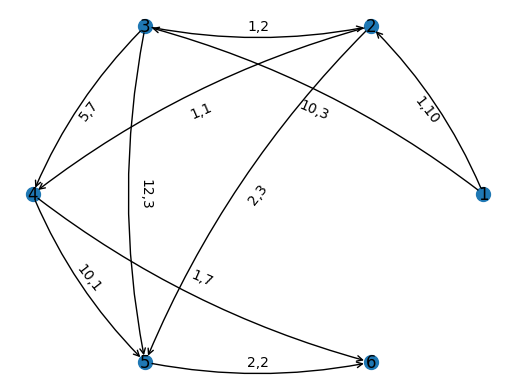

In [80]:
edges = [(1,2),(1,3),(3,2),(2,4),(2,5),(3,4),(3,5),(4,5),(4,6),(5,6)]
c = [1,10,1,1,2,5,12,10,1,2]
cap = [10,3,2,1,3,7,3,1,7,2]
b = [[1,3,2],
     [0,0,0],
     [0,0,0],
     [-1,0,0],
     [0,-3,0],
     [0,0,-2]
     ]

c_dict = dict(zip(edges, c))
cap_dict = dict(zip(edges, cap))


graph = nx.DiGraph()
graph.add_edges_from(edges)



nx.set_edge_attributes(graph, c_dict,"c")
nx.set_edge_attributes(graph, cap_dict,"cap")
# nx.set_node_attributes(graph, {n:b[i] for i,n in enumerate(graph.nodes)}, "b")#mogoce kdaj


plot_multigraph(graph,with_labels=True)

In [60]:
print(nx.incidence_matrix(graph,oriented=True).todense())

[[-1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. -1. -1. -1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0. -1. -1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  1.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]]


In [82]:
#V,E
n = 6 # |V|
m = 10 # |E|
t = 3


# spremenljivke
X = cp.Variable((m,t),integer=True)

# parametri
# c = cp.Parameter(m)
# cap = cp.Parameter(m)
# B = cp.Parameter((n,m))
# b = cp.Parameter((n,t))

# c = [1,10,1,1,2,5,12,10,1,2]
# cap = [10,3,2,1,3,7,3,1,7,2]
# B = [[1,1,0,0,0,0,0,0,0,0],
#      [-1,0,-1,1,1,0,0,0,0,0],
#      [0,-1,1,0,0,1,1,0,0,0],
#      [0,0,0,-1,0,-1,0,1,1,0],
#      [0,0,0,0,-1,0,-1,-1,0,1],
#      [0,0,0,0,0,0,0,0,-1,-1]]
c = [data["c"] for _,_, data in graph.edges(data=True)]
cap = [data["cap"] for _,_, data in graph.edges(data=True)]
B = -1 * nx.incidence_matrix(graph,oriented=True).todense()
b = [[1,3,2],
     [0,0,0],
     [0,0,0],
     [-1,0,0],
     [0,-3,0],
     [0,0,-2]
     ]
c = np.array(c)
cap = np.array(cap)
B = np.array(B)
b = np.array(b)

# kriterijska funkcija
obj = cp.Minimize(c.T @ cp.sum(X,axis=1))

# omejitve
constraints = [
    cp.sum(X,axis=1) <= cap,
    B @ X == b,
    X >= 0        
]

prob = cp.Problem(obj, constraints)

prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", X.value)

status: optimal
optimal value 43.0
optimal var [[ 0.  3.  1.]
 [ 1.  0.  1.]
 [ 0. -0.  1.]
 [-0.  3. -0.]
 [-0. -0. -0.]
 [ 1. -0.  1.]
 [-0. -0. -0.]
 [-0.  0. -0.]
 [ 0.  0.  2.]
 [-0. -0. -0.]]


[(1, 2), (1, 2), (1, 2), (1, 3), (1, 3), (1, 3), (2, 4), (2, 4), (2, 5), (2, 5), (3, 2), (3, 4), (3, 4), (3, 4), (3, 5), (4, 5), (4, 6), (4, 6), (5, 6)]


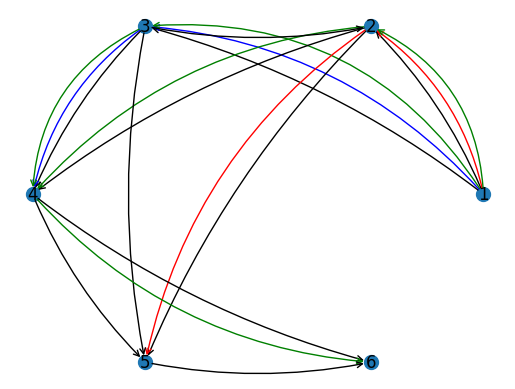

In [78]:

multi = nx.MultiDiGraph(graph)
for k in range(X.value.shape[1]):
    
    path = [e for i,e in enumerate(graph.edges) if X.value[i,k] != 0]
    multi.add_edges_from(path, color=COLORS[k])
# print(list(multi.edges()))
plot_multigraph(multi)